# NOTE: If you are planning to use YAGMAIL for email alerts, please makes sure the relevant package has been installed/tested

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

if os.getcwd()[-7:] == 'AAM_Sim':
    print(os.getcwd())
else:
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    print(os.getcwd())

from CrossPlatformDev import my_print, join_str

import time

from MonteCarlo.TwoAircraftEncounter.ScenarioMP import simulate_encounter

C:\Users\quekz\PycharmProjects\AAM_Sim


In [2]:
from tqdm.notebook import tqdm
import multiprocessing as mp

Init_Param_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Init_Param.csv')

data = pd.read_csv(Init_Param_Path)

data = data['Run'].unique()
data = data[0:20]

if __name__ == '__main__':
    start = time.time()
    # with mp.Pool(processes = psutil.cpu_count(logical=True)) as pool:
    with mp.Pool(processes = 1) as pool:
        results = list(tqdm(pool.imap(simulate_encounter, data), total = len(data)))
        pool.close()
        pool.join()
        results = pd.concat(results)
        #joined_df = df.set_index('Flight no.').join(results.set_index('Flight no.'), on = 'Flight no.')
        end = time.time()
        
compute_time = end-start
simulated_flight_time_s = results['Total_Flight_Time'].sum()
speedup = simulated_flight_time_s/compute_time
print('Took %.3f seconds, simulated flight time is %.3f seconds, total speedup is %.3f times'%(end-start, 
                                                                                               simulated_flight_time_s, 
                                                                                               speedup))

results

  0%|          | 0/20 [00:00<?, ?it/s]

Took 2768.548 seconds, simulated flight time is 6013.892 seconds, total speedup is 2.172 times


,Run,AC1_NSE_Radial_Error_Mean,AC1_NSE_Radial_Error_Std,AC1_NSE_Mean_x,AC1_NSE_Mean_y,AC1_NSE_Mean_z,AC1_NSE_Std_x,AC1_NSE_Std_y,AC1_NSE_Std_z,AC2_NSE_Radial_Error_Mean,...,WC3b_Detected,WC3c_Start_Time,WC3c_End_Time,WC3c_Detected,WC3d_Start_Time,WC3d_End_Time,WC3d_Detected,WC3e_Start_Time,WC3e_End_Time,WC3e_Detected
0,0,5.858770,3.296247,2.265826,1.295344,1.576072,3.157600,5.329897,3.151411,8.233858,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
0,1,6.779792,2.870655,-2.167275,-0.013533,2.393029,5.007449,4.943096,4.140182,7.760199,...,1,1.604167,19.587500,1,1.391667,19.587500,1,1.258333,19.587500,1
0,2,8.959218,3.702739,-1.785498,-5.063830,-1.074960,3.213573,7.404057,3.228448,8.826924,...,1,2.641667,18.704167,1,2.537500,18.708333,1,2.470833,18.708333,1
0,3,6.192599,4.040929,1.813262,-3.389921,-2.641381,3.760681,5.074913,2.580495,5.645274,...,1,2.087500,16.133333,1,1.970833,16.133333,1,1.866667,16.133333,1
0,4,6.208770,3.009954,-1.430971,2.013975,1.653496,3.610334,5.335739,3.953139,7.525738,...,1,2.354167,19.395833,1,2.137500,19.395833,1,1.962500,19.395833,1
0,5,8.936447,4.954195,1.978926,4.312394,0.219257,4.433818,7.888715,3.293118,5.713707,...,1,0.941667,19.166667,1,0.845833,19.170833,1,0.762500,19.170833,1
0,6,7.896317,3.734766,-3.918166,-2.728611,1.800797,3.953271,6.154204,2.439590,6.694977,...,1,3.329167,28.362500,1,3.258333,28.362500,1,3.204167,28.362500,1
0,7,7.039422,2.344361,-0.377717,-0.281433,0.166433,5.803467,4.598612,3.539609,6.747833,...,1,1.491667,11.770833,1,1.345833,11.895833,1,1.220833,11.987500,1
0,8,6.879438,3.289470,-2.202730,-0.171191,-1.948313,4.694459,5.588175,2.161680,7.389325,...,1,1.425000,13.520833,1,1.220833,13.533333,1,1.070833,13.545833,1
0,9,5.640467,2.827317,-2.054929,-1.741905,0.539118,3.900339,4.163984,2.848066,7.677171,...,1,1.137500,11.766667,1,1.050000,11.766667,1,0.987500,11.770833,1


In [3]:
results.columns

Index(['Run', 'AC1_NSE_Radial_Error_Mean', 'AC1_NSE_Radial_Error_Std',
       'AC1_NSE_Mean_x', 'AC1_NSE_Mean_y', 'AC1_NSE_Mean_z', 'AC1_NSE_Std_x',
       'AC1_NSE_Std_y', 'AC1_NSE_Std_z', 'AC2_NSE_Radial_Error_Mean',
       ...
       'WC3b_Detected', 'WC3c_Start_Time', 'WC3c_End_Time', 'WC3c_Detected',
       'WC3d_Start_Time', 'WC3d_End_Time', 'WC3d_Detected', 'WC3e_Start_Time',
       'WC3e_End_Time', 'WC3e_Detected'],
      dtype='object', length=103)

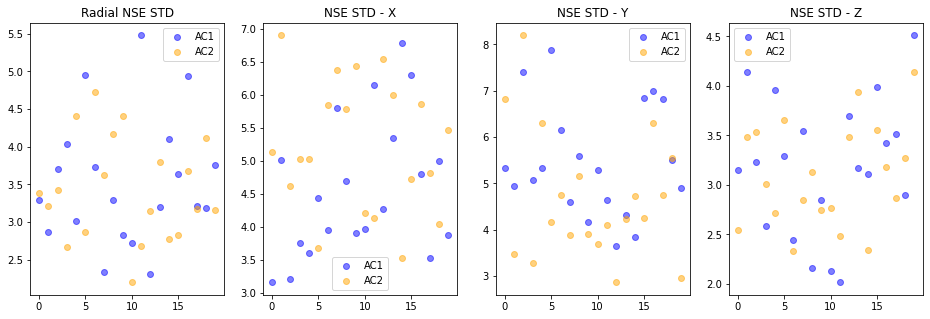

In [4]:
fig, axs = plt.subplots(ncols=4, figsize=(16,5))

axs[0].scatter(results['Run'], results['AC1_NSE_Radial_Error_Std'], label='AC1', color='b', alpha=0.5)
axs[0].scatter(results['Run'], results['AC2_NSE_Radial_Error_Std'], label='AC2', color='orange', alpha=0.5)
axs[0].set_title('Radial NSE STD')
axs[0].legend()

axs[1].scatter(results['Run'], results['AC1_NSE_Std_x'], label='AC1', color='b', alpha=0.5)
axs[1].scatter(results['Run'], results['AC2_NSE_Std_x'], label='AC2', color='orange', alpha=0.5)
axs[1].set_title('NSE STD - X')
axs[1].legend()

axs[2].scatter(results['Run'], results['AC1_NSE_Std_y'], label='AC1', color='b', alpha=0.5)
axs[2].scatter(results['Run'], results['AC2_NSE_Std_y'], label='AC2', color='orange', alpha=0.5)
axs[2].set_title('NSE STD - Y')
axs[2].legend()

axs[3].scatter(results['Run'], results['AC1_NSE_Std_z'], label='AC1', color='b', alpha=0.5)
axs[3].scatter(results['Run'], results['AC2_NSE_Std_z'], label='AC2', color='orange', alpha=0.5)
axs[3].set_title('NSE STD - Z')
axs[3].legend()



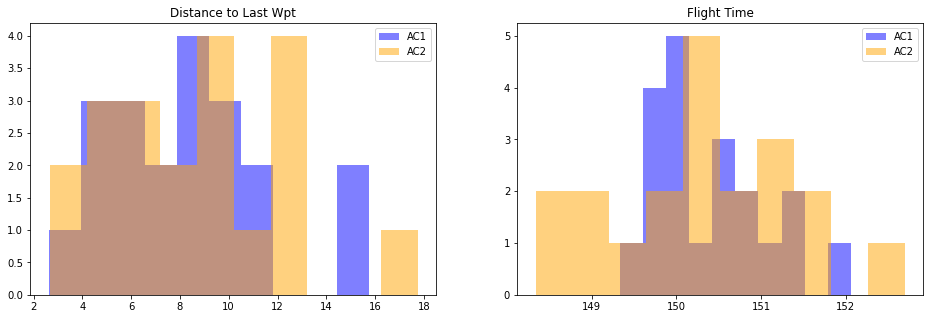

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))

axs[0].hist(results['AC1_Dist_to_Last_WPT'], color='b', alpha=0.5, label = 'AC1')
axs[0].hist(results['AC2_Dist_to_Last_WPT'], color='orange', alpha=0.5, label = 'AC2')
axs[0].set_title('Distance to Last Wpt')
axs[0].legend()

axs[1].hist(results['AC1_EndState_Time'], color='b', alpha=0.5, label = 'AC1')
axs[1].hist(results['AC2_EndState_Time'], color='orange', alpha=0.5, label = 'AC2')
axs[1].set_title('Flight Time')
axs[1].legend()

In [7]:
Results_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Results.csv')

results.to_csv(Results_Path)

In [8]:
import yagmail

user = yagmail.SMTP(user='tmuas2022@gmail.com', password='@Tmri1234')

# user.send(to='zhihao.quek@ntu.edu.sg', subject='Test Email', \
#           contents='Dear Zhi Hao,\n\nTesting yagmail. \n\nBest Regards, \nYour Friendly Machine',
#           attachments = [Init_Param_Path, Results_Path]
#          )

user.send(to='zhihao.quek16@sps.nus.edu.sg', subject='Monte Carlo Simulation Results', 
         contents='Dear Zhi Hao, \n\nThe Monte Carlo Simulation has ended.' + 
          'If using AWS, please terminate the session. \n\nBest Regards, \nYour Friendly Machine')

{}